<a href="https://colab.research.google.com/github/Dhurbaach/Bike-rental/blob/main/Dogvscat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# Configurating the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#importing dogvs cat dataset from kaggle
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
# extracting the train dataset
dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
# counting no of files in train folder
import os
len(os.listdir('/content/train'))


25000

In [7]:
# Printing the name of images
file_names=os.listdir('train/')
print(file_names)

['dog.11191.jpg', 'dog.10779.jpg', 'dog.9670.jpg', 'dog.4372.jpg', 'cat.10149.jpg', 'dog.10567.jpg', 'cat.10175.jpg', 'cat.3359.jpg', 'cat.12189.jpg', 'dog.11742.jpg', 'dog.617.jpg', 'dog.1720.jpg', 'cat.9785.jpg', 'dog.10723.jpg', 'dog.5795.jpg', 'dog.5943.jpg', 'dog.2509.jpg', 'dog.4472.jpg', 'cat.8390.jpg', 'cat.10672.jpg', 'cat.1669.jpg', 'cat.2556.jpg', 'cat.3909.jpg', 'dog.8811.jpg', 'dog.9842.jpg', 'dog.12295.jpg', 'cat.2508.jpg', 'dog.715.jpg', 'cat.3753.jpg', 'cat.4192.jpg', 'cat.7212.jpg', 'cat.9385.jpg', 'cat.7834.jpg', 'dog.2776.jpg', 'dog.7172.jpg', 'cat.12455.jpg', 'dog.6763.jpg', 'dog.6539.jpg', 'cat.8185.jpg', 'dog.2726.jpg', 'cat.5635.jpg', 'cat.3554.jpg', 'dog.5934.jpg', 'cat.4836.jpg', 'cat.527.jpg', 'dog.1765.jpg', 'dog.3432.jpg', 'cat.6453.jpg', 'cat.11654.jpg', 'dog.830.jpg', 'cat.11773.jpg', 'dog.4364.jpg', 'cat.12156.jpg', 'cat.1833.jpg', 'cat.2130.jpg', 'cat.1280.jpg', 'dog.5845.jpg', 'dog.8655.jpg', 'cat.9315.jpg', 'cat.4041.jpg', 'cat.2655.jpg', 'dog.11705.jp

In [8]:
# importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

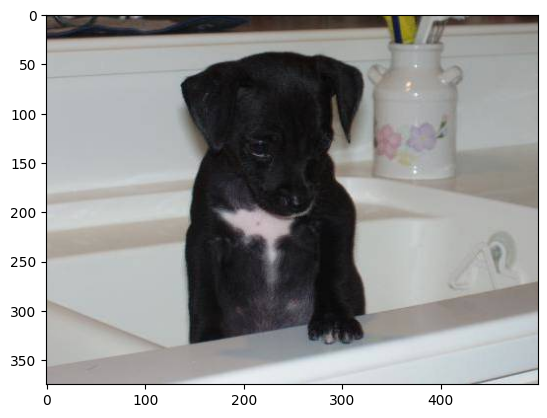

In [9]:
# Display dog image
img=mpimg.imread('train/dog.8298.jpg')
imgplt=plt.imshow(img)
plt.show()

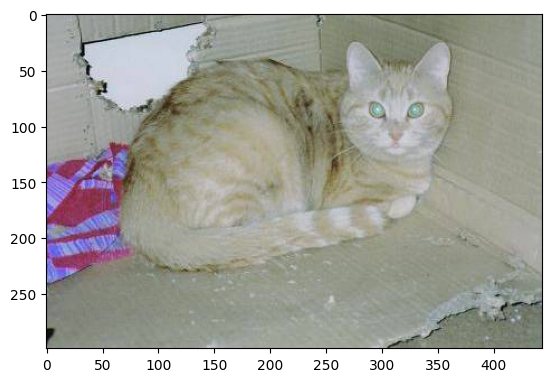

In [10]:
# Display cat image
img=mpimg.imread('train/cat.996.jpg')
imgplt=plt.imshow(img)
plt.show()

In [11]:
file_names=os.listdir('/content/train/')

for i in range(5):
    name=file_names[i]
    print(name[0:3])

dog
dog
dog
dog
cat


In [12]:
# Counting number of cat and dog images
cat_count=0
dog_count=0
file_names=os.listdir('/content/train/')
for i in range(len(file_names)):
    name=file_names[i]
    if name[0:3]=='cat':
        cat_count+=1
    else:
        dog_count+=1
print("Number of cat images:",cat_count)
print("Number of dog images:",dog_count)

Number of cat images: 12500
Number of dog images: 12500


In [13]:
# creating a directory
os.mkdir('image resized')

FileExistsError: [Errno 17] File exists: 'image resized'

In [ ]:
# Resizing all the images
original_folder='/content/train/'
resized_folder='/content/image resized/'
for i in range(2000):
   filename=os.listdir(original_folder)[i]
   img_path=original_folder+filename

   img=Image.open(img_path)
   img=img.resize((224,224))
   img=img.convert('RGB')

   newimgpath=resized_folder+filename
   img.save(newimgpath)

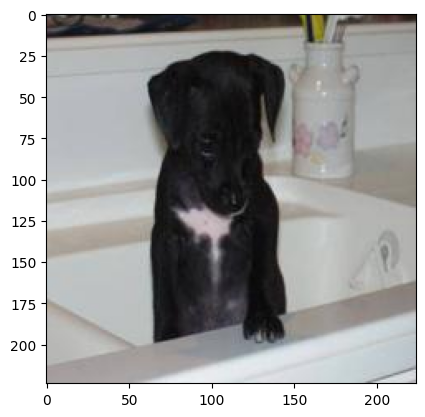

In [14]:
# Display resized dog image
img=mpimg.imread('image resized/dog.8298.jpg')
plt.imshow(img)
plt.show()

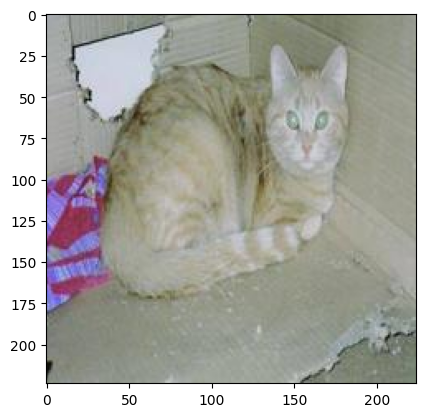

In [15]:
# displaying resized cat image
img=mpimg.imread('image resized/cat.996.jpg')
plt.imshow(img)
plt.show()

In [16]:
# Creating labels
labels=[]
for i in range(2000):
    filename=os.listdir('/content/image resized/')[i]
    if filename[0:3]=='cat':
        labels.append(0)
    else:
        labels.append(1)

In [17]:
print(labels)

[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 

In [18]:
# Converting images to numpy array
import cv2
import glob

image_directory='image resized/'
image_extensions=['jpg','png']

files=[]

[files.extend(glob.glob(image_directory+'*.'+e)) for e in image_extensions]
dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [19]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [20]:
# Counting the images of dogs and cats
values, counts=np.unique(labels,return_counts=True)
print(values,counts)

[0 1] [1003  997]


In [21]:
X=dog_cat_images
Y=np.asarray(labels)

In [22]:

# Train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


Building a Neural Network

In [23]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [31]:
!pip install tensorflow

In [32]:
# # from tensorflow.keras import layers
# import tensorflow as tf
# import tensorflow_hub as hub

In [33]:
# mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
# pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.applications import MobileNetV2

# Using Functional API with tf.keras.applications
def build_working_model():
    # Create input tensor
    inputs = Input(shape=(224, 224, 3), dtype=tf.float32, name='input_layer')

    # Load MobileNetV2 base model from tf.keras.applications
    base_model = MobileNetV2(input_shape=(224, 224, 3),
                             include_top=False,  # Exclude the classification layer
                             weights='imagenet') # Use pre-trained weights

    # Freeze the base model layers
    base_model.trainable = False

    # Connect the base model to the input
    x = base_model(inputs)

    # Add custom layers for classification
    x = layers.GlobalAveragePooling2D()(x) # Pool the feature maps
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(2, activation='softmax')(x) # Output layer for 2 classes (dogs and cats)

    return Model(inputs=inputs, outputs=outputs)

# Build and test the model
model = build_working_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to verify the structure
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Dummy input prediction shape: (1, 2)


In [46]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8837 - loss: 0.2518
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9842 - loss: 0.0451
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9860 - loss: 0.0398
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9898 - loss: 0.0244
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9989 - loss: 0.0099


In [47]:
score,acc=model.evaluate(X_test_scaled,Y_test)
print('Test score:',score)
print('Test accuracy:',acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9749 - loss: 0.0870
Test score: 0.11560987681150436
Test accuracy: 0.9649999737739563


Enter the image path:/content/catimg.jpg


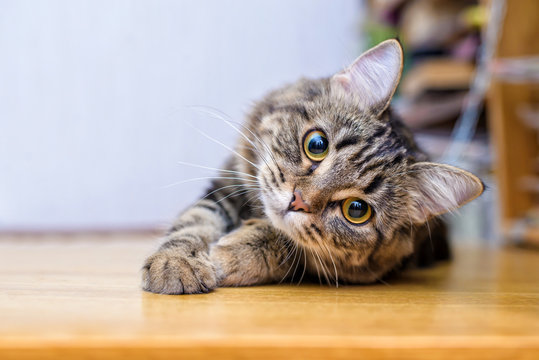

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[9.9996734e-01 3.2606695e-05]]
0
The image is of a cat


In [52]:
# Creating a predictive system
input_image_path=input('Enter the image path:')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255
input_image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(input_image_reshaped)
input_pred_label=np.argmax(input_prediction)
print(input_prediction)
print(input_pred_label)
if input_pred_label==0:
    print('The image is of a cat')
else:
    print('The image is of a dog')